# 1. Аналіз розподілу оцінок
Є 30 результатів тесту учнів. 
  - Потрібно:
    - Знайти середнє, медіану і моду.
    - Пояснити, чи є у вибірці викиди (дуже низькі чи високі бали).

In [10]:
import pandas as pd
import numpy as np
from scipy import stats

scores = [85, 92, 78, 88, 95, 45, 80, 75, 85, 90, 82, 71, 99, 86, 79, 88, 93, 85, 81, 77, 98, 52, 75, 83, 90, 85, 84, 91, 78, 80]

# 1
mean_value = np.mean(scores)
# 2
median_value = np.median(scores)
# 3
mode_result = stats.mode(scores, keepdims=True)

print("--- Основні статистичні показники ---")
print(f"Середнє арифметичне: {mean_value:.2f}")
print(f"Медіана: {median_value}")
print(f"Мода: {mode_result}")

print("\n--- Аналіз симетрії розподілу ---")
if mean_value < median_value:
    print(f"Середнє ({mean_value:.2f}) < Медіани ({median_value}).")
    print("Висновок: Розподіл має негативну (лівосторонню) асиметрію.")
    print("Це означає, що у вибірці є низькі значення (викиди), які 'тягнуть' середнє арифметичне вниз.")
elif mean_value > median_value:
    print(f"Середнє ({mean_value:.2f}) > Медіани ({median_value}).")
    print("Висновок: Розподіл має позитивну (правосторонню) асиметрію.")
else:
    print(f"Середнє ({mean_value:.2f}) ≈ Медіани ({median_value}).")
    print("Висновок: Розподіл близький до симетричного.")

--- Основні статистичні показники ---
Середнє арифметичне: 82.33
Медіана: 84.5
Мода: ModeResult(mode=array([85]), count=array([4]))

--- Аналіз симетрії розподілу ---
Середнє (82.33) < Медіани (84.5).
Висновок: Розподіл має негативну (лівосторонню) асиметрію.
Це означає, що у вибірці є низькі значення (викиди), які 'тягнуть' середнє арифметичне вниз.


# 2. Перевірка рівномірності
Під час рекламної кампанії збирали кількість кліків кожні 10 хвилин протягом 5 годин.
Потрібно:
- Визначити, чи можна припустити, що кліки розподілені рівномірно у часі.
- Пояснити, що це означає для ефективності реклами.    

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import chisquare


observed_clicks = [
    10, 12, 11, 15, 14, 18, # Година 1
    22, 25, 23, 26, 28, 25, # Година 2
    30, 32, 29, 27, 26, 24, # Година 3
    20, 18, 19, 16, 14, 15, # Година 4
    13, 11, 10, 9, 12, 11   # Година 5
]

df = pd.DataFrame({
    'interval': range(1, 31),
    'clicks': observed_clicks
})

print("--- Наші дані про кліки ---")
print(df.head())


# --- Розрахунок описових статистик ---
mean_clicks = np.mean(observed_clicks)
median_clicks = np.median(observed_clicks)
mode_clicks = stats.mode(observed_clicks, keepdims=True)
variance_clicks = np.var(observed_clicks)
std_clicks = np.std(observed_clicks)

print("--- 1. Статистика кліків ---")
print(f"Середнє значення (Mean): {mean_clicks:.2f} кліків за інтервал")
print(f"Медіана (Median): {median_clicks} кліків")
print(f"Мода (Mode): {mode_clicks.mode[0]} кліків (зустрічається {mode_clicks.count[0]} рази)")
print(f"Дисперсія (Variance): {variance_clicks:.2f}")
print(f"Середньоквадратичне відхилення (Std): {std_clicks:.2f}")
print(f"Висчновок: Середньоквадратичне відхилення ({std_clicks:.2f}) досить велике порівняно з середнім ({mean_clicks:.2f})," 
        "\nщо вказує на значну мінливість (нестабільність) кількості кліків у часі.")

--- Наші дані про кліки ---
   interval  clicks
0         1      10
1         2      12
2         3      11
3         4      15
4         5      14
--- 1. Статистика кліків ---
Середнє значення (Mean): 18.83 кліків за інтервал
Медіана (Median): 18.0 кліків
Мода (Mode): 11 кліків (зустрічається 3 рази)
Дисперсія (Variance): 47.87
Середньоквадратичне відхилення (Std): 6.92
Висчновок: Середньоквадратичне відхилення (6.92) досить велике порівняно з середнім (18.83),
що вказує на значну мінливість (нестабільність) кількості кліків у часі.


In [24]:
# Проводимо Хі-квадрат тест
# f_obs - спостережувані частоти, f_exp - очікувані частоти
chi2_statistic, p_value = chisquare(f_obs=df['clicks'], f_exp=expected_clicks_per_interval)

print("\n--- Результати тесту Хі-квадрат ---")
print(f"Статистика Хі-квадрат: {chi2_statistic:.2f}")
print(f"P-значення (p-value): {p_value:.4f}")

alpha = 0.05
print(f"\nПоріг значущості (альфа): {alpha}")

if p_value < alpha:
    print("\nВисновок: P-значення < альфа. Різниця між реальністю та ідеалом є статистично значущою.")
    print("Відповідь: НІ, ми не можемо припустити, що кліки розподілені рівномірно.")
else:
    print("\nВисновок: P-значення >= альфа. У нас немає достатньо доказів, щоб відкинути ідею про рівномірність.")
    print("Відповідь: ТАК, можна припустити, що кліки розподілені рівномірно (відхилення не є значущими).")


--- Результати тесту Хі-квадрат ---
Статистика Хі-квадрат: 76.26
P-значення (p-value): 0.0000

Поріг значущості (альфа): 0.05

Висновок: P-значення < альфа. Різниця між реальністю та ідеалом є статистично значущою.
Відповідь: НІ, ми не можемо припустити, що кліки розподілені рівномірно.


## Фінальний висновок: що це означає для ефективності реклами?
На основі нашого прикладу (де p-value буде дуже малим):
- Що ми побачили? Розподіл кліків нерівномірний. 
Графік чітко показує, що найбільша активність була в середині періоду (друга та третя година), а на початку і в кінці — значно менша.
- Що це означає для ефективності реклами?
Існують "гарячі години": Ефективність вашої реклами сильно залежить від часу доби. Є пікові періоди, коли аудиторія найбільш активна і готова клікати.
Оптимізація бюджету: Замість того, щоб "розпиляти" рекламний бюджет рівномірно протягом дня, його варто концентрувати саме в ці пікові періоди (в нашому випадку, на другу та третю годину спостережень). Це дозволить отримати більше кліків за ті самі гроші.
Планування контенту: Нові акції, найважливіші оголошення чи пости варто публікувати саме перед початком цих "гарячих годин", щоб отримати максимальне охоплення.
- Якби результат був іншим (розподіл рівномірний):
Це означало б, що ефективність реклами не залежить від часу доби. Ваша цільова аудиторія активна однаково протягом всього періоду. В такому випадку рекламний бюджет можна розподіляти рівномірно, а час публікації контенту не має вирішального значення.

# 3. Визначення типу розподілу по даним
Є список часу (у хвилинах), який користувачі проводять на сайті.
- Завдання:
    - Обчислити середнє і медіану.
    - Порівняти ці значення та зробити висновок про тип розподілу (наприклад, нормальний чи зсунутий).

In [40]:
import numpy as np

time_spent = [
    1, 2, 2, 3, 3,
    3, 4, 4, 5, 5, 
    6, 6, 7, 8, 9, 
    10, 12, 15, 20, 
    25, 30, 45, 60
]

# 1
mean_time = np.mean(time_spent)
# 2
median_time = np.median(time_spent)

print("--- Статистичний аналіз часу на сайті ---")
print(f"Середній час на сайті (Mean): {mean_time:.2f} хв.")
print(f"Медіанний час на сайті (Median): {median_time:.2f} хв.")

# Висновок
print("\n--- Порівняння та висновок про розподіл ---")
if mean_time > median_time:
    asymmetry_type = "позитивну (правостороння) асиметрію"
    explanation = (
        "Це означає, що більшість користувачів проводять на сайті відносно небагато часу "
        f"(близько {median_time:.0f} хв), але є невелика кількість користувачів, які залишаються дуже довго."        
    )
elif mean_time < median_time:
    asymmetry_type = "негативну (лівостороння) асиметрію"
    explanation = (
        "Це означає, що більшість користувачів проводять на сайті багато часу, "
        "але є невелика кількість дуже коротких сесій."
    )
else:
    asymmetry_type = "симетричну асиметрію"
    explanation = "Це означає, що час розподілений рівномірно навколо центрального значення."

print(f"Висновок: Середнє ({mean_time:.2f}) > Медіани ({median_time:.2f}), розподіл має {asymmetry_type}.")
print(explanation)


--- Статистичний аналіз часу на сайті ---
Середній час на сайті (Mean): 12.39 хв.
Медіанний час на сайті (Median): 6.00 хв.

--- Порівняння та висновок про розподіл ---
Висновок: Середнє (12.39) > Медіани (6.00), розподіл має позитивну (правостороння) асиметрію.
Це означає, що більшість користувачів проводять на сайті відносно небагато часу (близько 6 хв), але є невелика кількість користувачів, які залишаються дуже довго.


# 4. Аналіз кореляції між двома показниками
Дані про кількість тренувань на тиждень і рівень фізичної форми (шкала 1–10).
- Потрібно:
    - Обчислити коефіцієнт кореляції.
    - Пояснити, що означає його значення (напрямок і сила зв’язку).


In [41]:
import numpy as np
from scipy import stats

# Кількість тренувань за тиждень.
workouts_per_week = [1, 2, 2, 3, 3, 4, 4, 5, 5, 5, 6, 7, 7, 8]

# Рівень фізичної форми за шкалою від 1 до 10 (суб'єктивна оцінка).
fitness_level = [3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 8, 9, 10]


# Коефіцієнт кореляції Пірсона
correlation_coefficient, p_value = stats.pearsonr(workouts_per_week, fitness_level)

print("--- Аналіз кореляції ---")
print(f"Коефіцієнт кореляції Пірсона (r): {correlation_coefficient:.4f}")
print(f"P-значення (p-value): {p_value:.4f}")


# Висновок
print("\n--- Інтерпретація коефіцієнта кореляції ---")

# Аналіз напрямку зв'язку
if correlation_coefficient > 0:
    direction = "позитивний (прямий)"
    direction_explanation = "Це означає, що зі збільшенням кількості тренувань на тиждень, рівень фізичної форми також має тенденцію до зростання."
elif correlation_coefficient < 0:
    direction = "негативний (зворотний)"
    direction_explanation = "Це означає, що зі збільшенням кількості тренувань, рівень форми має тенденцію до зниження (що малоймовірно)."
else:
    direction = "відсутній"
    direction_explanation = "Це означалє, що між цими двома показниками немає лінійного зв'язку."

print(f"Напрямок зв'язку: {direction}.")
print(direction_explanation)

# Аналіз сили зв'язку
strength = "невизначена"
if abs(correlation_coefficient) >= 0.9:
    strength = "дуже сильна"
elif abs(correlation_coefficient) >= 0.7:
    strength = "сильна"
elif abs(correlation_coefficient) >= 0.5:
    strength = "помірна"
elif abs(correlation_coefficient) >= 0.3:
    strength = "слабка"
else:
    strength = "дуже слабка або відсутня"

print(f"\nСила зв'язку: {strength}.")
print(f"Значення {correlation_coefficient:.2f} вказує на дуже міцний зв'язок між змінними.")


--- Аналіз кореляції ---
Коефіцієнт кореляції Пірсона (r): 0.9537
P-значення (p-value): 0.0000

--- Інтерпретація коефіцієнта кореляції ---
Напрямок зв'язку: позитивний (прямий).
Це означає, що зі збільшенням кількості тренувань на тиждень, рівень фізичної форми також має тенденцію до зростання.

Сила зв'язку: дуже сильна.
Значення 0.95 вказує на дуже міцний зв'язок між змінними.


# 5. Оцінка трендів у продажах
Є щомісячні дані про продажі товару за рік.
- Завдання:
  - Знайти середній місячний обсяг продажів.
    - Визначити, чи є тенденція зростання або зниження.
    - Пояснити, як це допоможе у плануванні.

In [45]:
import numpy as np
from scipy import stats


# Місяці року
months = np.arange(1, 13)
# Щомісячні продажі товару
sales = [20, 22, 25, 24, 28, 30, 31, 35, 33, 38, 40, 45]
average_sales = np.mean(sales)

print("--- Аналіз продажів ---")
print(f"Середній місячний обсяг продажів: {average_sales:.2f} тис. одиниць")

# Кореляцію між часом (місяцями) і продажами.
trend_correlation, p_value = stats.pearsonr(months, sales)

print("\n--- Аналіз тренду ---")
print(f"Коефіцієнт кореляції між часом та продажами: {trend_correlation:.4f}")

# Висновок
trend_type = ""
if trend_correlation > 0.5:
    trend_type = "чітка тенденція до зростання продажів"
elif trend_correlation < -0.5:
    trend_type = "чітка тенденція до зниження продажів"
else:
    trend_type = "відсутність чіткого лінійного тренду"
print(f"Висновок: Існує {trend_type}.")

--- Аналіз продажів ---
Середній місячний обсяг продажів: 30.92 тис. одиниць

--- Аналіз тренду ---
Коефіцієнт кореляції між часом та продажами: 0.9812
Висновок: Існує чітка тенденція до зростання продажів.


# 6. Оцінка ризику активів
- Інвестор має дані про прибуток двох активів: середній прибуток і дисперсію.
    - Завдання:
        - Визначити, який актив більш ризикований.
        - Пояснити, що таке дисперсія і як вона пов’язана з ризиком.

In [47]:
import numpy as np
from scipy import stats

# Вхідні дані від інвестора:
# Середній річний прибуток (у відсотках)
mean_profit_A = 10.0
mean_profit_B = 12.0

# Дисперсія прибутку (квадрат відсотків)
variance_A = 4.0
variance_B = 25.0


# Стандартне відхилення
std_dev_A = np.sqrt(variance_A)
std_dev_B = np.sqrt(variance_B)

print("--- Аналіз ризику двох активів ---")
print(f"Актив А: Середній прибуток = {mean_profit_A}%, Стандартне відхилення (ризик) = {std_dev_A}%")
print(f"Актив B: Середній прибуток = {mean_profit_B}%, Стандартне відхилення (ризик) = {std_dev_B}%")


print("\n--- Визначення ризику ---")
more_risky_asset = ""
if std_dev_A > std_dev_B:
    more_risky_asset = "Актив А"
else:
    more_risky_asset = "Актив B"

print(f"Висновок: {more_risky_asset} є більш ризикованим, оскільки його стандартне відхилення (і дисперсія) значно вище.")

--- Аналіз ризику двох активів ---
Актив А: Середній прибуток = 10.0%, Стандартне відхилення (ризик) = 2.0%
Актив B: Середній прибуток = 12.0%, Стандартне відхилення (ризик) = 5.0%

--- Визначення ризику ---
Висновок: Актив B є більш ризикованим, оскільки його стандартне відхилення (і дисперсія) значно вище.


# 7. Виявлення аномалій у транзакціях
- У базі даних транзакцій помічені незвичайні значення суми платежів.
    - Потрібно:
        - Обчислити середнє і стандартне відхилення по сумам.
        - Визначити, які платежі можна вважати аномальними (з великою відстанню від середнього).

In [52]:
import numpy as np


# Список сум фінансових транзакцій (у гривнях).
transactions = [
    150, 250, 300, 220, 180, 210, 
    230, 190, 260, 310, 280, 200,
    170, 240, 290, 5000, 270, 220, 
    250, 10, 160, 300, 210, 4500
]
# 1 Перетворюємо у NumPy масив
transactions = np.array(transactions)
# 2
mean_transaction = np.mean(transactions)
# 3
std_transaction = np.std(transactions)

print("--- Статистика по транзакціях ---")
print(f"Середня сума транзакції (Mean): {mean_transaction:.2f} грн.")
print(f"Стандартне відхилення (Std Dev): {std_transaction:.2f} грн.")

# Визначення аномалій за допомогою Z-оцінки (Правило 3-сигм) ---
# Формула: Z = (значення - середнє) / стандартне_відхилення
z_scores = (transactions - mean_transaction) / std_transaction

# Встановлюємо поріг, аномалії
threshold = 3.0

# Знаходимо аномалії
anomalies = transactions[np.abs(z_scores) > threshold]
normal_transactions = transactions[np.abs(z_scores) <= threshold]

print(f"\n--- Виявлення аномалій (поріг Z-оцінки > {threshold}) ---")
if len(anomalies) > 0:
    print(f"Знайдено {len(anomalies)} аномальних транзакцій:")
    for anomaly in anomalies:
        print(f"  - {anomaly:.2f} грн.")
else:
    print("Аномальних транзакцій за даним критерієм не знайдено.")

--- Статистика по транзакціях ---
Середня сума транзакції (Mean): 600.00 грн.
Стандартне відхилення (Std Dev): 1254.91 грн.

--- Виявлення аномалій (поріг Z-оцінки > 3.0) ---
Знайдено 2 аномальних транзакцій:
  - 5000.00 грн.
  - 4500.00 грн.


# 8. Оцінка ефективності рекламної кампанії
- Порівняти середні продажі за місяць до і після запуску реклами.
- Потрібно:
    - Обчислити середні для обох періодів.
    - Оцінити, чи є зміни статистично значущими (пояснити ідею тесту).

--- Аналіз середніх продажів ---
Середні продажі до реклами: 52.10 одиниць/день
Середні продажі після реклами: 62.10 одиниць/день
Різниця: +10.00 одиниць/день

Спостереження: Після запуску реклами середні продажі виросли. Але чи є це зростання статистично значущим?

--- Результати Незалежного t-тесту ---
T-статистика: 11.54
P-значення (p-value): 1.1839937907676973e-16

--- Висновок про статистичну значущість ---
Оскільки p-value (1.18e-16) < 0.05, ми відхиляємо нульову гіпотезу.
Висновок: Зростання продажів є статистично значущим. Рекламна кампанія, ймовірно, була ефективною.


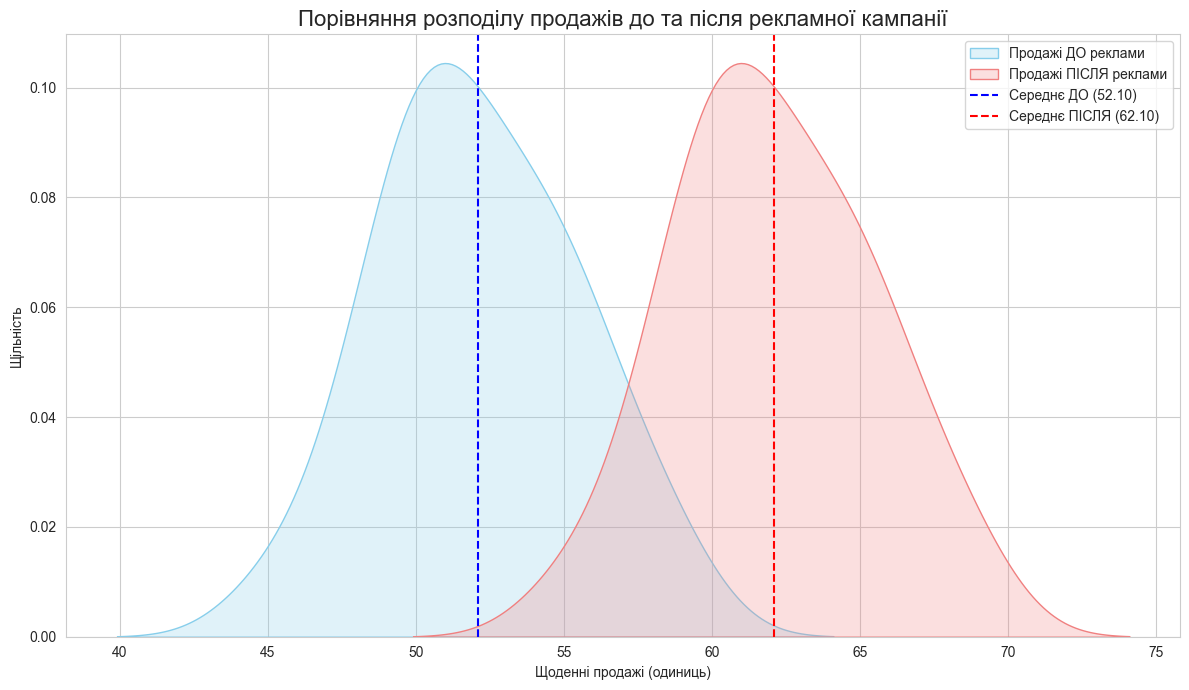

In [54]:
# --- Крок 1: Імпорт бібліотек та визначення даних ---
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Вхідні дані: щоденні продажі (в одиницях)
# 30 днів до запуску рекламної кампанії
sales_before = [
    50, 55, 48, 52, 53, 58, 45, 50, 51, 54, 49, 56, 53, 50, 55,
    52, 47, 59, 51, 54, 50, 48, 56, 53, 55, 51, 50, 57, 52, 49
]

# 30 днів після запуску рекламної кампанії
sales_after = [
    60, 65, 58, 62, 63, 68, 55, 60, 61, 64, 59, 66, 63, 60, 65,
    62, 57, 69, 61, 64, 60, 58, 66, 63, 65, 61, 60, 67, 62, 59
]
# Перетворюємо у NumPy масиви
sales_before = np.array(sales_before)
sales_after = np.array(sales_after)


# --- Крок 2: Обчислення середніх значень для обох періодів ---
mean_before = np.mean(sales_before)
mean_after = np.mean(sales_after)

print("--- Аналіз середніх продажів ---")
print(f"Середні продажі до реклами: {mean_before:.2f} одиниць/день")
print(f"Середні продажі після реклами: {mean_after:.2f} одиниць/день")
print(f"Різниця: +{mean_after - mean_before:.2f} одиниць/день")
print("\nСпостереження: Після запуску реклами середні продажі виросли. Але чи є це зростання статистично значущим?")


# --- Крок 3: Оцінка статистичної значущості (Незалежний t-тест) ---
# Ми використовуємо t-тест для двох незалежних вибірок, оскільки
# продажі в один день не залежать від продажів в інший.
# Тест повертає два значення:
# 1. t-statistic: Показує, наскільки велика різниця між середніми відносно мінливості даних.
# 2. p-value: Ймовірність отримати таку або ще більшу різницю чисто випадково,
#    якби насправді реклама не мала жодного ефекту.
t_statistic, p_value = stats.ttest_ind(sales_after, sales_before)

# Встановлюємо поріг значущості (альфа)
alpha = 0.05

print(f"\n--- Результати Незалежного t-тесту ---")
print(f"T-статистика: {t_statistic:.2f}")
print(f"P-значення (p-value): {p_value}") # Виводимо у науковій нотації

print("\n--- Висновок про статистичну значущість ---")
if p_value < alpha:
    print(f"Оскільки p-value ({p_value:.2e}) < {alpha}, ми відхиляємо нульову гіпотезу.")
    print("Висновок: Зростання продажів є статистично значущим. Рекламна кампанія, ймовірно, була ефективною.")
else:
    print(f"Оскільки p-value ({p_value:.2e}) > {alpha}, ми не можемо відхилити нульову гіпотезу.")
    print("Висновок: У нас немає достатньо статистичних доказів, щоб стверджувати, що рекламна кампанія була ефективною. Різниця могла бути випадковою.")


# --- Крок 4: Візуалізація для наочності ---
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Графіки щільності розподілу для обох періодів
sns.kdeplot(sales_before, fill=True, color='skyblue', label='Продажі ДО реклами')
sns.kdeplot(sales_after, fill=True, color='lightcoral', label='Продажі ПІСЛЯ реклами')

# Вертикальні лінії для середніх
plt.axvline(mean_before, color='blue', linestyle='--', label=f'Середнє ДО ({mean_before:.2f})')
plt.axvline(mean_after, color='red', linestyle='--', label=f'Середнє ПІСЛЯ ({mean_after:.2f})')

# Налаштування графіку
plt.title('Порівняння розподілу продажів до та після рекламної кампанії', fontsize=16)
plt.xlabel('Щоденні продажі (одиниць)')
plt.ylabel('Щільність')
plt.legend()
plt.tight_layout()

plt.show()